In questo notebook proveremo a creare una semplice Rete Neurale Convolutiva con l'ausilio di Keras. Keras è un modulo di tensorflow che fornisce un'API di alto livello per costruire e addestrare reti neurali.

Per prima cosa importiamo il dataset MNIST, integrato in Keras




In [21]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


In [38]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)

(60000, 28, 28)


(28, 28)
5


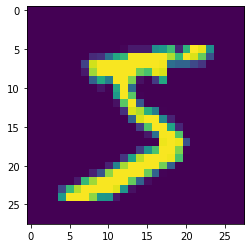

In [39]:
plt.imshow(X_train[0])
print(X_train[0].shape)

print(y_train[0])

Facciamo una considerazione sulla shape del dataset e delle singole immagini. Partiamo da una shape di `(60000, 28, 28)` il che significa che abbiamo 60000 immagini di dimensioni 28x28. Questo significa che abbiamo una sequenza di immagini bidimensionali in cui *non* è specificato il numero di canali. Abbiamo bisogno, per far funzionare la nostra rete in Keras, di dire esplicitamente che stiamo usando delle immagini con 3 dimensioni (la terza dimensione esprime il numero di canali ed è quella che effettivamente rende il nostro input un volume). Per questo motivo facciamo un reshape dei dataset in ingresso (sia quello di train che quello di test): 


In [42]:
print(X_train.shape)

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

print(X_train.shape)

X_train = X_train/255
X_test = X_test/255

(60000, 28, 28)
(60000, 28, 28, 1)


In [43]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(
    Conv2D(
        64, 
        kernel_size=3, 
        activation='relu', 
        input_shape=(28,28,1) # This is the shape of each input image, 28,28,1 with the 1 signifying that the images are greyscale.
    )
)


model.add(
    Conv2D(
        32, 
        kernel_size=3, 
        activation='relu'
    )
)

model.add(
    Flatten() # Flatten serves as a connection between the convolution and dense layers.
)

model.add(
    Dense(
        units=10, 
        activation='softmax' # Softmax makes the output sum up to 1 so the output can be interpreted as probabilities.
    )
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_4 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4)

Epoch 1/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1282 - accuracy: 0.9619 - val_loss: 0.0527 - val_accuracy: 0.9844
Epoch 2/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.0468 - val_accuracy: 0.9852
Epoch 3/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0368 - val_accuracy: 0.9882
Epoch 4/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0213 - accuracy: 0.9929 - val_loss: 0.0433 - val_accuracy: 0.9876


In [51]:
test_score = model.evaluate(X_test, y_test)
print(test_score)
print(model.metrics_names)
print('Test metrics: {} {:.4f}, {} {:.2f}%'.format(
    model.metrics_names[0], 
    test_score[0], 
    model.metrics_names[1],
    test_score[1] * 100
    )
)


313/313 [==============================] - 1s 2ms/step - loss: 0.0433 - accuracy: 0.9876
[0.04334918037056923, 0.9876000285148621]
['loss', 'accuracy']
Test metrics: loss 0.0433, accuracy 98.76%


loss
accuracy
val_loss
val_accuracy


Text(0, 0.5, 'loss')

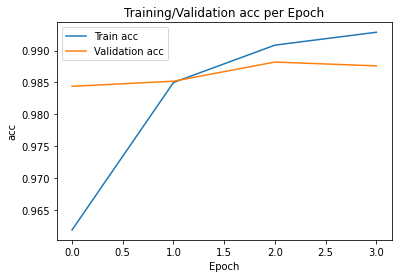

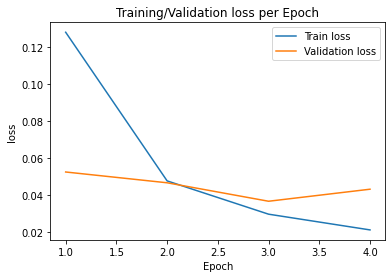

In [52]:
for i in history.history:
  print(i)



f, ax = plt.subplots()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])

# disegno della legenda nella migliore posizione automaticamente: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

f2, ax2 = plt.subplots()
ax2.plot([None] + history.history['loss'])
ax2.plot([None] + history.history['val_loss'])
ax2.legend(['Train loss', 'Validation loss'], loc = 0)
ax2.set_title('Training/Validation loss per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('loss')


In [32]:
import numpy as np

In [64]:
prediction = model.predict(X_test[0:100])
print(prediction.shape)

classes = np.argmax(prediction, axis=1)
print(classes)

length = 100
success = 0

for i in range(0, len(classes)):
    print("Prediction -> ", classes[i])
    print("Label      -> ", np.argmax(y_test[i]))
    print("\n")

    if classes[i] == np.argmax(y_test[i]):
        success = success + 1
    
    
print("Predizioni totali: {} su {} ({}%)".format(success, length, success/length*100))


(100, 10)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
Prediction ->  7
Label      ->  7


Prediction ->  2
Label      ->  2


Prediction ->  1
Label      ->  1


Prediction ->  0
Label      ->  0


Prediction ->  4
Label      ->  4


Prediction ->  1
Label      ->  1


Prediction ->  4
Label      ->  4


Prediction ->  9
Label      ->  9


Prediction ->  5
Label      ->  5


Prediction ->  9
Label      ->  9


Prediction ->  0
Label      ->  0


Prediction ->  6
Label      ->  6


Prediction ->  9
Label      ->  9


Prediction ->  0
Label      ->  0


Prediction ->  1
Label      ->  1


Prediction ->  5
Label      ->  5


Prediction ->  9
Label      ->  9


Prediction ->  7
Label      ->  7


Prediction ->  3
Label      ->  3


Prediction ->  4
Label      ->  4


Prediction ->  9
Label      ->  9


Prediction ->  6
Label      ->